In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from data_pipeline import transformation_pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
data = pd.read_csv('content/preprocessed_train.csv')

In [4]:
pipeline, data_cleaned = transformation_pipeline(
    data, building_id=122, meter=0, primary_use=99)

C:\Users\shomer\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\shomer\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\projects\Research-Buildings-Energy-forecasting-using-Deep-Learning\data_fetcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [5]:
transformed_data = pipeline.fit_transform(data_cleaned)

In [6]:
x_train, x_val, y_train, y_val = train_test_split(transformed_data[:, 1:],
                                                  transformed_data[:, 0],
                                                  test_size=0.2,
                                                  shuffle=False,
                                                  random_state=2021)

In [8]:
x_val.shape

(1753, 14)

In [6]:
train_gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train,
                                                                y_train,
                                                                length=6, sampling_rate=1,
                                                                stride=1, batch_size=32
                                                                )

val_gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(x_val,
                                                              y_val,
                                                              length=6, sampling_rate=1,
                                                              stride=1, batch_size=32
                                                              )

In [10]:
model = tf.keras.Sequential([tf.keras.layers.SimpleRNN( 128, activation='relu',
                                                  return_sequences=False),
                            tf.keras.layers.Dense(1)])


In [11]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0001))

cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=15,
                                      restore_best_weights=True)
# Fitting the model
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=100,
                    callbacks=[cb],
                    shuffle=False)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.3595 - val_loss: 0.0842
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0594 - val_loss: 0.0551
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0471 - val_loss: 0.0743
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0387 - val_loss: 0.0861
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0369 - val_loss: 0.0737
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0308 - val_loss: 0.0635
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0261 - val_loss: 0.0541
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0460
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.0398
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0196 - val_lo

In [12]:
model.save('models/RNN_ADAM')

INFO:tensorflow:Assets written to: models/RNN_ADAM\assets


In [13]:
predicted_batch_7 = model.predict(val_gen[7][0])

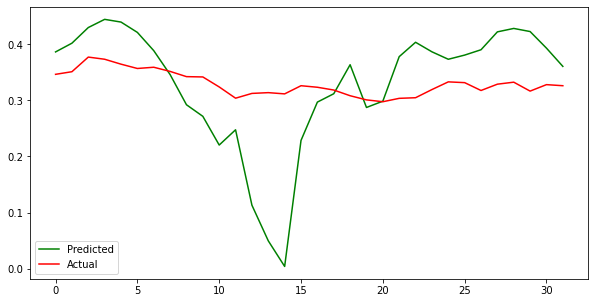

In [14]:
_, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(32),
        predicted_batch_7,
        color='green', label='Predicted')

ax.plot(range(32),
        val_gen[7][1],
        color='red', label='Actual')
ax.legend()

plt.show()

In [15]:
predicted = []
actual = []
for i in range(32):
    predicted.extend(model.predict(val_gen[i][0]))
    actual.extend(val_gen[i][1])

In [16]:
print('Testing Loss= ', np.mean(tf.keras.losses.MSE(actual, predicted)))
# Testing Loss=  0.04267618

Testing Loss=  0.04267618


No handles with labels found to put in legend.
No handles with labels found to put in legend.


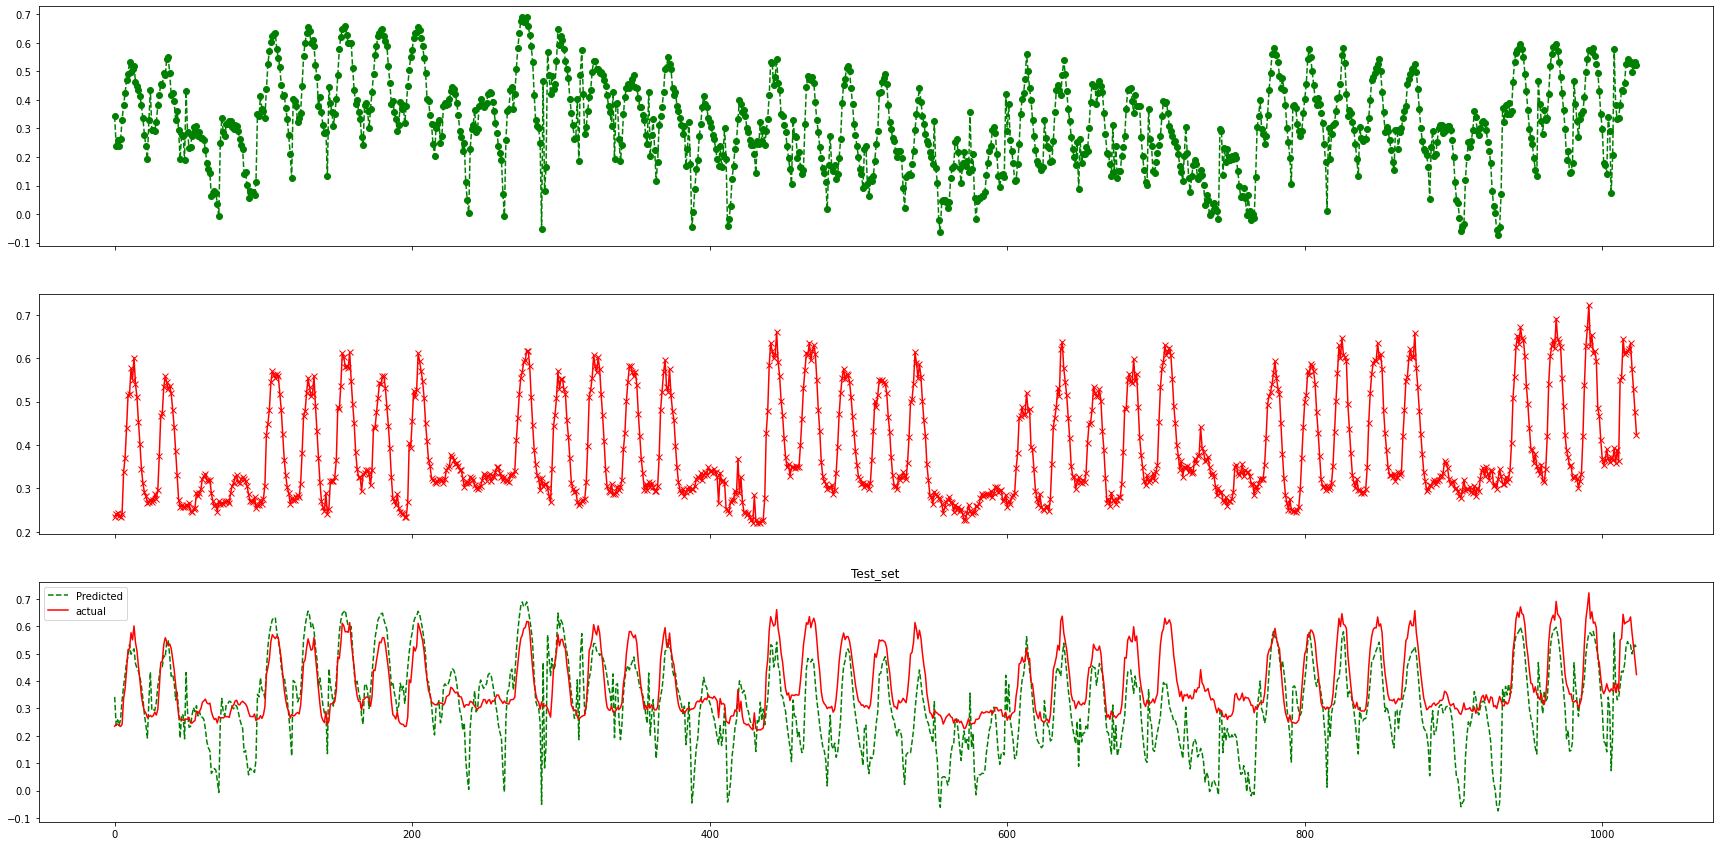

In [17]:
fig, (ax1, ax2, ax) = plt.subplots(3, 1,  figsize=(30, 15), sharex=True)

ax1.plot(range(len(actual)),
         predicted,
         color='green', marker='o', linestyle='dashed', label='Predicted')
plt.legend()

ax2.plot(range(len(actual)),
         actual,
         color='red', marker='x', label='Actual')
plt.legend()

ax.plot(range(len(actual)),
        predicted,
        color='green', linestyle='dashed',
        label='Predicted')
plt.legend()
ax.plot(range(len(actual)),
        actual,
        color='red',
        label='actual')

plt.legend()

plt.title('Test_set', loc='center')

plt.show()

In [18]:
predicted_t = []
actual_t = []
for i in range(32):
    predicted_t.extend(model.predict(train_gen[i][0]))
    actual_t.extend(train_gen[i][1])

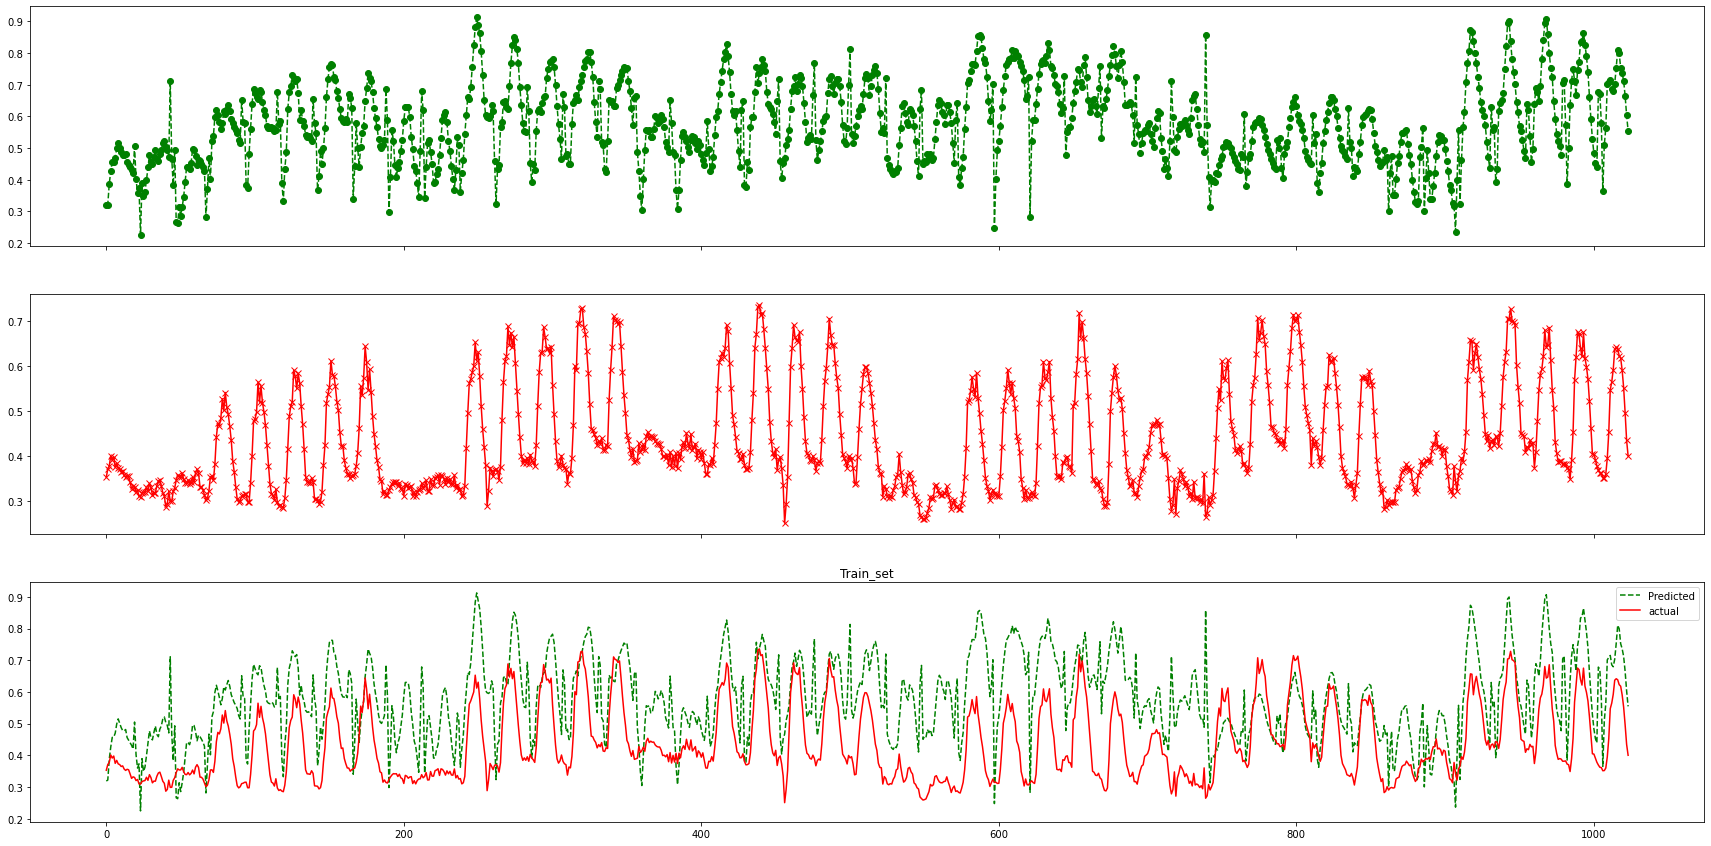

In [19]:
fig, (ax1, ax2, ax) = plt.subplots(3, 1,  figsize=(30, 15), sharex=True)

ax1.plot(range(len(actual_t)),
         predicted_t,
         color='green', marker='o', linestyle='dashed',
         label='Predicted')

ax2.plot(range(len(actual_t)),
         actual_t,
         color='red', marker='x', label='Actual')


ax.plot(range(len(actual_t)),
        predicted_t,
        color='green', linestyle='dashed',
        label='Predicted')

ax.plot(range(len(actual_t)),
        actual_t,
        color='red',
        label='actual')
plt.title('Train_set', loc='center')

plt.legend()

plt.show()

In [20]:
model.summary()
# Total params: 18,433

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               18304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 18,433
Trainable params: 18,433
Non-trainable params: 0
_________________________________________________________________
